# pre installation

In [ ]:
!pip install qiskit
!pip install qiskit-aer
!pip install qiskit[visualization]
!pip install qiskit-ibm-runtime
!pip install pylatexenc
!pip install qiskit-experiments
!pip install kagglehub[pandas-datasets]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 73.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=9871f2d2ec1e40b78ff2f5de20a84033d786ffe50c0f12eaf59cc6b0baa9fd7a
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.9/363.9 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Import LIB

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import ZZFeatureMap
from sklearn.datasets import  load_iris
from qiskit_experiments.library import StateTomography
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.quantum_info import Statevector, Operator
from qiskit.circuit.library import QFT,PauliEvolutionGate,QFT
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import PhaseEstimation
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import  load_iris
from sklearn.decomposition import PCA
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
from sklearn.datasets import fetch_california_housing, load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# DATA

In [ ]:
data = pd.read_csv('https://datacatalogfiles.worldbank.org/ddh-published/0066034/10/DR0094183/global_biod_species_occ_endemism_and_small_range.csv')

In [ ]:
data.columns

Index(['species', 'kingdom', 'phylum', 'class', 'order', 'family', 'genus',
       'grp', 'lcat', 'area', 'd_smallrange25', 'd_smallrange100',
       'd_endemic100', 'd_endemic095', 'd_endemic090', 'max_sh_spp', 'WB_ISO',
       'ISO_A3', 'WB_DATANAM', 'type'],
      dtype='object')

In [ ]:
data.shape

(597578, 20)

In [ ]:
data.dropna(inplace=True)

In [ ]:
y = data['type'].values
data = data.drop('type', axis=1)

In [ ]:
y.reshape(-1,1)

array([['land-eez'],
       ['land-eez'],
       ['land-eez'],
       ...,
       ['land-eez'],
       ['land-eez'],
       ['land-eez']], dtype=object)

In [ ]:
y = pd.factorize(y)[0]

In [ ]:
y_cls = y

In [ ]:
col = data.columns
lam = LabelEncoder()
for i in col:
    data[i] = lam.fit_transform(data[i])

In [ ]:
X_cls = data

In [ ]:
X_cls.shape

(557980, 19)

In [ ]:
pca = PCA(n_components=4)
X_cls = pca.fit_transform(X_cls)

In [ ]:
X_cls.shape

(557980, 4)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_normalized = scaler.fit_transform(x_train)
X_test_normalized = scaler.transform(x_test)
Y_normalized = scaler.fit_transform(y_train.reshape(-1, 1))
Y_test_normalized = scaler.transform(y_test.reshape(-1, 1))
num_dem = X_normalized.shape[1]

In [ ]:
num_target_dim=2

In [ ]:
num_samples, num_features = X_normalized.shape
next_power_of_two = 2 ** int(np.ceil(np.log2(num_features)))
num_padding = next_power_of_two - num_features
global_mean = np.mean(X_normalized)
X_normalized = np.pad(X_normalized, ((0,0), (0, num_padding)), mode='constant', constant_values=global_mean)
num_dem = X_normalized.shape[1]

In [ ]:
X_test_normalized = np.pad(X_test_normalized, ((0,0), (0, num_padding)),
                    mode='constant',
                    constant_values=global_mean)

In [ ]:
print(num_dem)

4


# Circute

In [ ]:
# تنظیمات اولیه
num_samples = X_normalized.shape[0]
num_features = X_normalized.shape[1]
num_qubits = int(np.log2(num_features))
num_eval_qubits =num_target_dim  # تعداد کیوبیتهای تخمین
feature_map = ZZFeatureMap(feature_dimension=num_qubits, reps=1, entanglement='linear')
qpe = QuantumCircuit(num_qubits + num_eval_qubits, num_eval_qubits)

/tmp/ipython-input-23-2663443981.py:6: DeprecationWarning: The class ``qiskit.circuit.library.data_preparation._zz_feature_map.ZZFeatureMap`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the z_feature_map function as a replacement. Note that this will no longer return a BlueprintCircuit, but just a plain QuantumCircuit.
  feature_map = ZZFeatureMap(feature_dimension=num_qubits, reps=1, entanglement='linear')


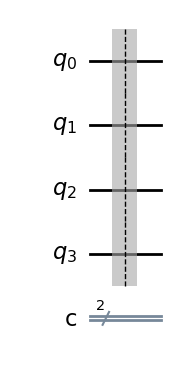

In [ ]:
qpe.barrier()
qpe.draw('mpl')

In [ ]:
# اضافه کردن Feature Map و کیوبیتهای تخمین
qpe.append(feature_map, range(num_qubits))
for qubit in range(num_eval_qubits):
    qpe.h(num_qubits + qubit)

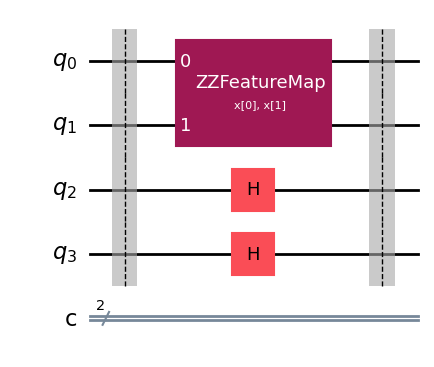

In [ ]:
qpe.barrier()
qpe.draw('mpl')

In [ ]:
# اعمال عملگر تکامل زمانی
hamiltonian = SparsePauliOp.from_operator(np.cov(X_normalized.T) / np.trace(np.cov(X_normalized.T)))  # ماتریس چگالی
t = 2 * np.pi
for qubit in range(num_eval_qubits):
    exponent = 2 ** (num_eval_qubits - qubit - 1)
    evolution_gate = PauliEvolutionGate(hamiltonian, time=-t * exponent)
    ctrl_evolution = evolution_gate.control(1)
    qpe.append(ctrl_evolution, [num_qubits +qubit ] +list(range(num_qubits)))

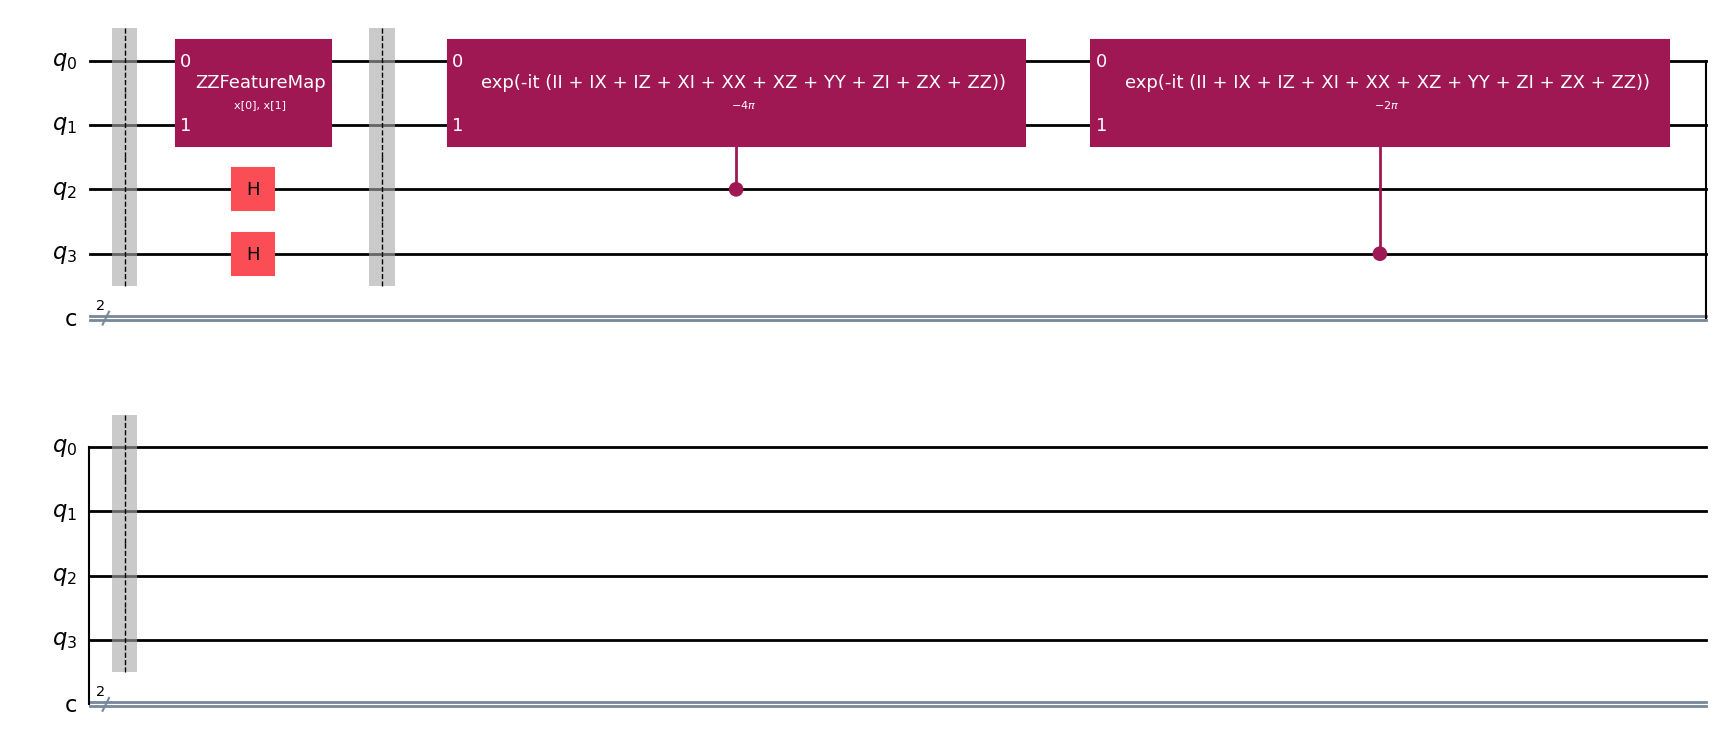

In [ ]:
qpe.barrier()
qpe.draw('mpl')

In [ ]:
# QFT معکوس و اندازهگیری
qpe.append(QFT(num_eval_qubits, inverse=True), range(num_qubits, num_qubits + num_eval_qubits))
qpe.measure(range(num_qubits, num_qubits + num_eval_qubits), range(num_eval_qubits))

/tmp/ipython-input-26-1819073879.py:2: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qpe.append(QFT(num_eval_qubits, inverse=True), range(num_qubits, num_qubits + num_eval_qubits))


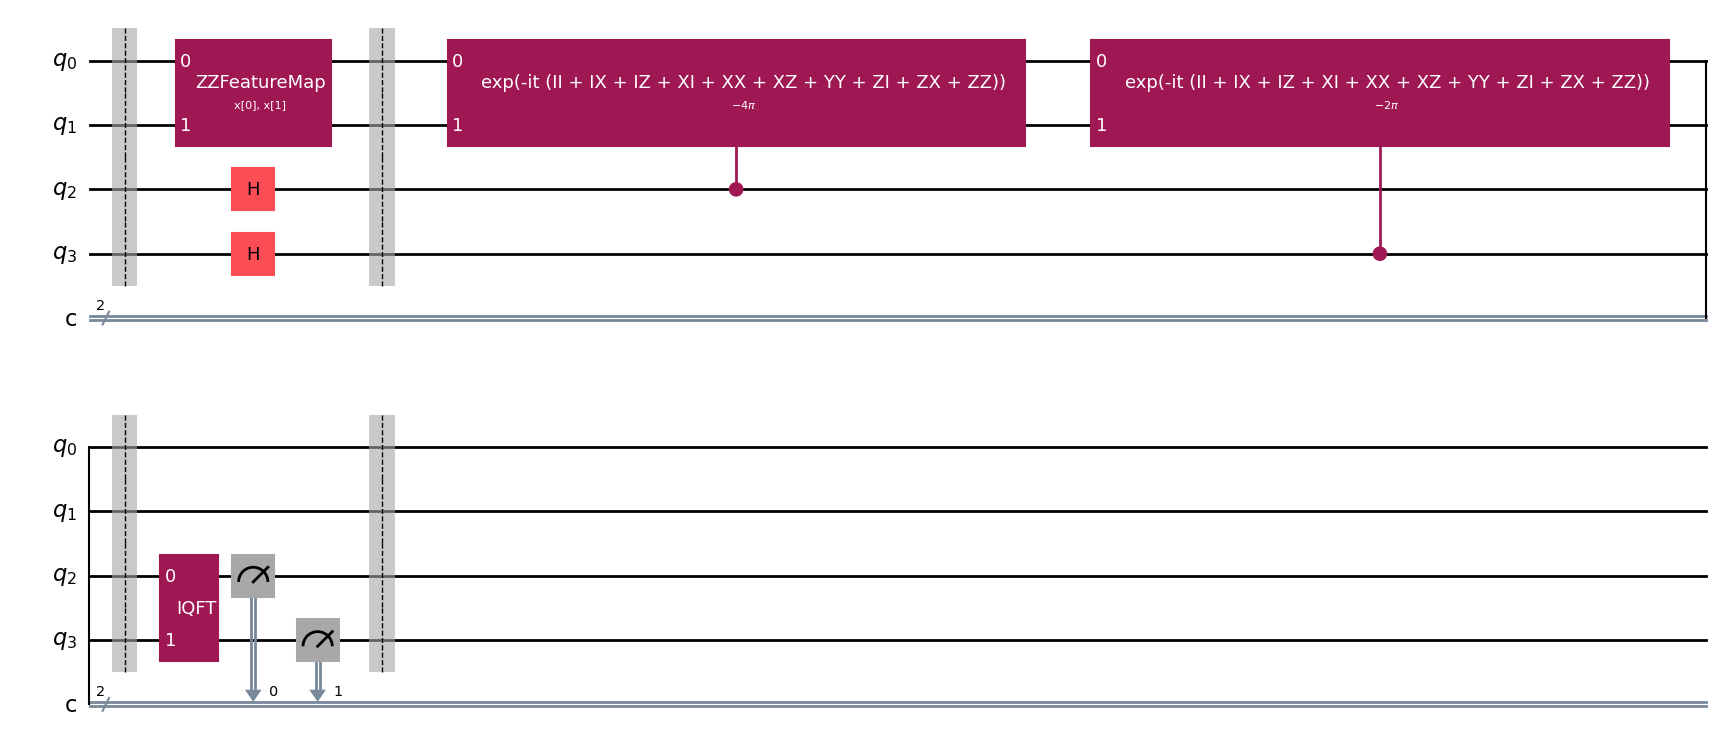

In [ ]:
qpe.barrier()
qpe.draw('mpl')

# Assign Parameters

In [ ]:
all_eigvecs = []
i =0
for sample_idx in range(num_samples//8):
    if i % 100 == 0 :
      print(i)
    sample = X_normalized[sample_idx]

    # نسبت دادن پارامترها به نمونه
    parameter_binds = {param: sample[i % num_qubits] for i, param in enumerate(feature_map.parameters)}
    bound_qpe = qpe.assign_parameters(parameter_binds)

    # جدا کردن کیوبیت‌های داده
    data_circuit = QuantumCircuit(num_qubits )
    for instruction in bound_qpe.data:
        if all(qubit in bound_qpe.qubits[:num_qubits] for qubit in instruction.qubits):
            qubit_indices = [bound_qpe.qubits.index(q) for q in instruction.qubits]
            data_circuit.append(instruction.operation, qubit_indices)

    # ترانسپایل مدار برای سازگاری با statevector_simulator
    simulator = Aer.get_backend('statevector_simulator')
    transpiled_circuit = transpile(data_circuit, simulator)

    # اجرای مدار ترانسپایل‌شده
    result = simulator.run(transpiled_circuit).result()
    statevector = result.get_statevector()

    # ساخت ماتریس چگالی از حالت کوانتومی
    rho_estimated = np.outer(statevector.data, np.conj(statevector.data))
    rho_estimated = (rho_estimated + rho_estimated.T.conj()) / 2

    # استخراج بردارهای ویژه
    eigvals, eigvecs = np.linalg.eigh(rho_estimated)
    all_eigvecs.append(eigvecs)
    i += 1

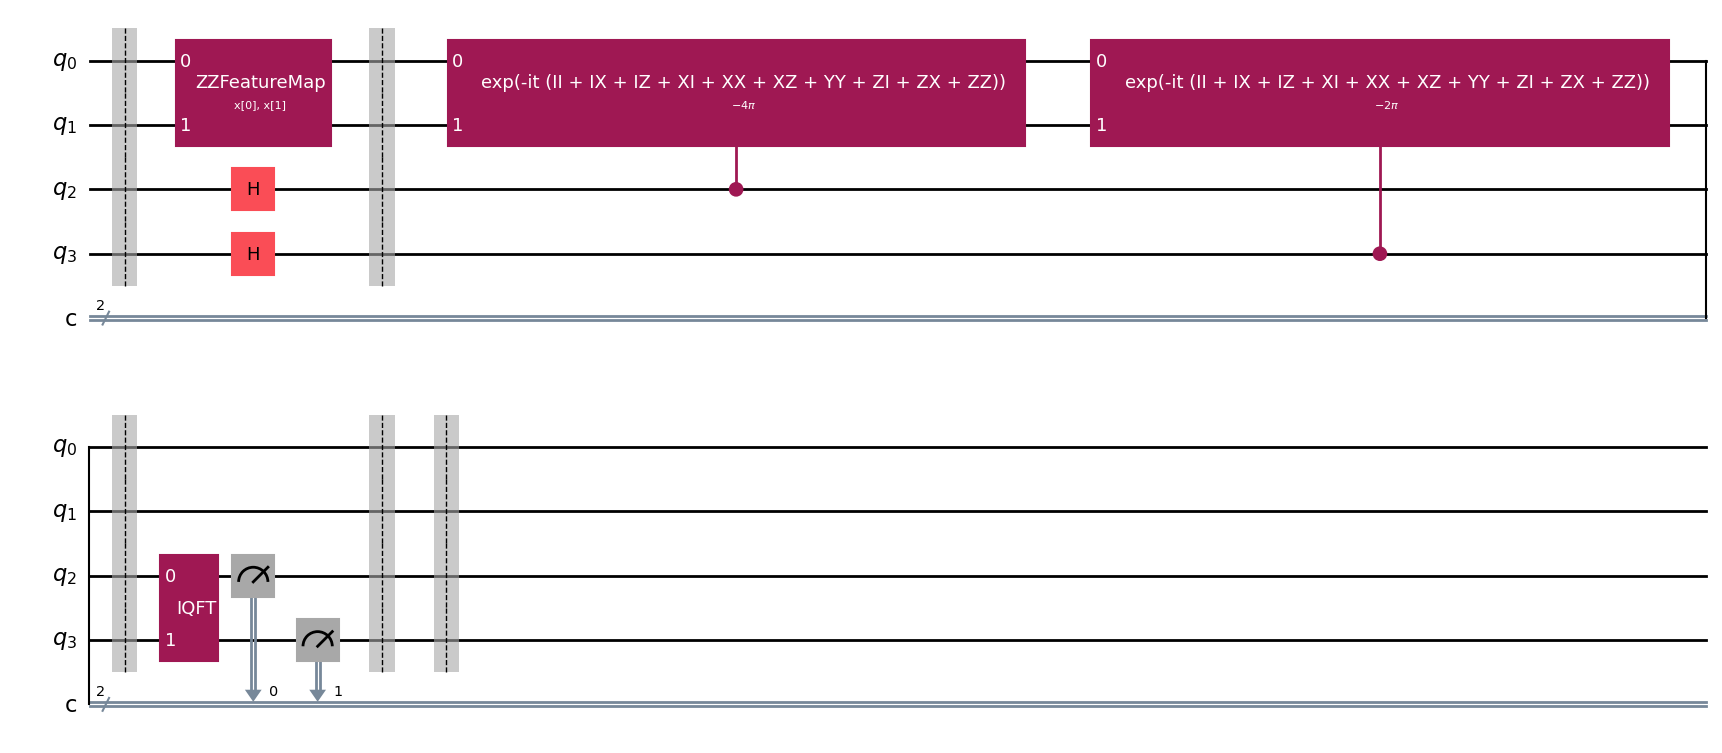

In [ ]:
qpe.barrier()
qpe.draw('mpl')

# Vectors

In [ ]:
# میانگینگیری از بردارهای ویژه
avg_eigvecs = np.mean(all_eigvecs, axis=0)
top_eigvecs = avg_eigvecs.real[:, :num_target_dim]

# Decompose

In [ ]:
# کاهش ابعاد دادهها با میانگین بردارهای ویژه
X_qpca = X_normalized[:55700] @ top_eigvecs

In [ ]:
print("دادههای کاهشیافته با QPCA (میانگینگیری شده):\n", X_qpca)

دادههای کاهشیافته با QPCA (میانگینگیری شده):
 [[0.64840478 0.56170693]
 [1.31470341 1.14536509]
 [1.72865211 1.67979102]
 [0.71390906 0.62129881]
 [0.50132932 0.4447042 ]
 [1.60534443 1.67321944]
 [1.721031   1.69719524]
 [0.83632747 0.71590576]
 [0.8059519  0.69283034]
 [1.02281078 0.85806164]
 [1.56089096 1.64695626]
 [1.70849997 1.71113777]
 [1.79079335 1.75305151]
 [1.03807985 0.91359384]
 [0.95621254 0.81377154]
 [1.00276665 1.01198581]
 [1.64118455 1.63930762]
 [1.88689898 1.90082468]
 [1.66870958 1.63085813]
 [2.48918063 2.51964686]
 [1.35682159 1.36492206]
 [2.37227605 2.35298597]
 [1.44835194 1.4816471 ]
 [0.79694069 0.6831249 ]
 [2.3223312  2.29336938]
 [1.2382787  1.211453  ]
 [0.78792949 0.67341947]
 [0.77793182 0.68410316]
 [1.01073267 0.90443626]
 [0.70968862 0.77030627]
 [1.63999915 1.68493153]
 [0.7556724  0.6608002 ]
 [0.62693292 0.54324961]
 [0.830884   0.76526529]
 [1.26240219 1.28667   ]
 [0.77638494 0.66697287]
 [1.37092056 1.36048211]
 [2.70785567 2.65407925]
 [0.

# **compair with PCA**

In [ ]:
pca = PCA(n_components=num_target_dim)
X_reduced = pca.fit_transform(X_normalized[:55700])

# SVC MODEL(PCA,QPCA)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
from sklearn.preprocessing import LabelBinarizer

In [ ]:
X_test_pca = pca.transform(X_test_normalized)

In [ ]:
X_test_qpca = X_test_normalized @ top_eigvecs

In [ ]:
svm_pca = SVC(probability=True).fit(X_reduced, y_train.ravel()[:55700])

In [ ]:
svm_qpca = SVC(probability=True).fit(X_qpca, y_train.ravel()[:55700])

In [ ]:
y_pred_pca = svm_pca.predict(X_test_pca)

In [ ]:
y_pred_qpca = svm_qpca.predict(X_test_qpca)

In [ ]:
# 4. محاسبه معیارهای ارزیابی
# --------------------------------------------------
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')

    # محاسبه AUC برای کلاس‌های چندگانه
    lb = LabelBinarizer()
    y_true_bin = lb.fit_transform(y_true)
    y_pred_bin = lb.transform(y_pred)

    auc = roc_auc_score(y_true_bin, y_pred_bin, multi_class='ovo')
    return accuracy, f1, auc

In [ ]:
# محاسبه برای PCA
acc_pca, f1_pca, auc_pca = calculate_metrics(y_test.ravel(), y_pred_pca)

In [ ]:
# محاسبه برای QPCA
acc_qpca, f1_qpca, auc_qpca = calculate_metrics(y_test.ravel(), y_pred_qpca)

In [ ]:
# 5. نمایش نتایج
# --------------------------------------------------
print("\n" + "="*40)
print("Comparing the performance of PCA and QPCA in classification")
print("="*40)
print(f"{'Metric':<15} | {'PCA':<10} | {'QPCA':<10}")
print("-"*40)
print(f"{'Accuracy':<15} | {acc_pca:.4f}    | {acc_qpca:.4f}")
print(f"{'F1-Score':<15} | {f1_pca:.4f}    | {f1_qpca:.4f}")
print(f"{'AUC-OVO':<15} | {auc_pca:.4f}    | {auc_qpca:.4f}")
print("="*40)

# گزارش کامل طبقه‌بندی
print("\nClassification report for PCA:")
print(classification_report(y_test, y_pred_pca))

print("\nClassification report for QPCA:")
print(classification_report(y_test, y_pred_qpca))

metrics = ['Accuracy', 'F1-Score', 'AUC-OVO']
pca_scores = [acc_pca, f1_pca, auc_pca]
qpca_scores = [acc_qpca, f1_qpca, auc_qpca]


Comparing the performance of PCA and QPCA in classification
Metric          | PCA        | QPCA      
----------------------------------------
Accuracy        | 0.9600    | 0.9600
F1-Score        | 0.9404    | 0.9404
AUC-OVO         | 0.5000    | 0.5000

Classification report for PCA:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    107134
           1       0.00      0.00      0.00      3721
           2       0.00      0.00      0.00       641
           3       0.00      0.00      0.00       100

    accuracy                           0.96    111596
   macro avg       0.24      0.25      0.24    111596
weighted avg       0.92      0.96      0.94    111596


Classification report for QPCA:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    107134
           1       0.00      0.00      0.00      3721
           2       0.00      0.00      0.00       641
           3       0.00     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

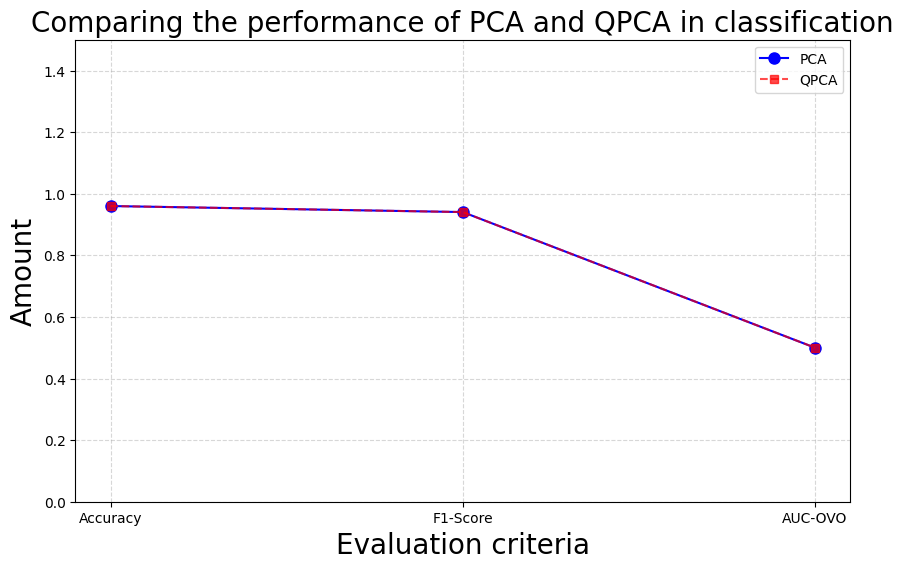

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(metrics, pca_scores, 'o-', label='PCA', color='blue', markersize=8)
plt.plot(metrics, qpca_scores, 's--', label='QPCA', color='red', alpha=0.7)
plt.xlabel('Evaluation criteria', fontsize=20)
plt.ylabel('Amount', fontsize=20)
plt.title('Comparing the performance of PCA and QPCA in classification', fontsize=20)
plt.ylim(0, 1.5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

# PLOT

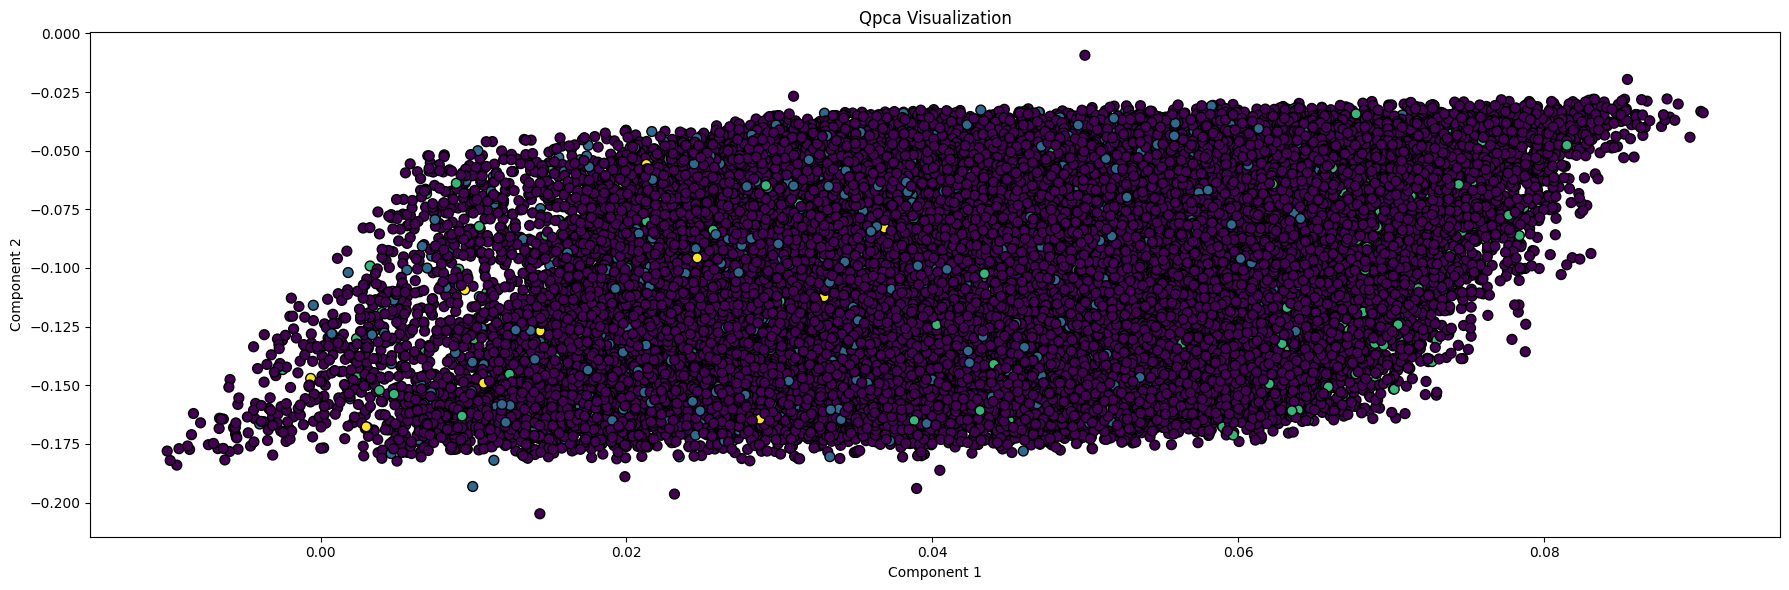

In [ ]:
plt.figure(figsize=(18, 6))

plt.scatter(X_qpca[:, 0], X_qpca[:, 1],c=Y_normalized[:55700],cmap='viridis', edgecolor='k', s=50)
plt.title(f'Qpca Visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.tight_layout()
plt.show()

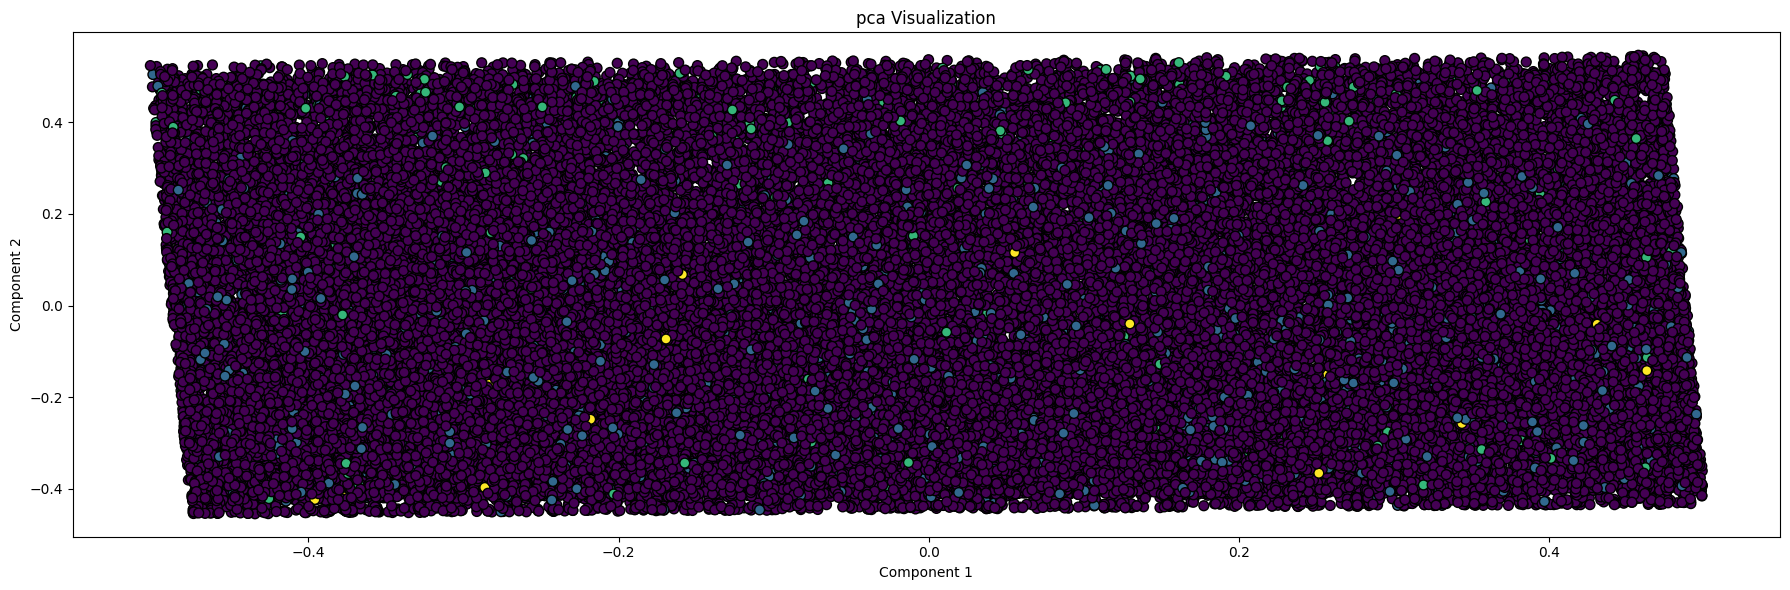

In [ ]:
pca = PCA(n_components=4)

plt.figure(figsize=(18, 6))

X_reduced = pca.fit_transform(X_normalized)

plt.scatter(X_reduced[:55700, 0], X_reduced[:55700, 1], c=Y_normalized[:55700],
            cmap='viridis', edgecolor='k', s=50)
plt.title(f'pca Visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.tight_layout()
plt.show()


SVC-PCA:
Accuracy: 0.96
Precision: 0.50
F1-Score: 0.94

SVC-QPCA:
Accuracy: 0.96
Precision: 0.50
F1-Score: 0.94


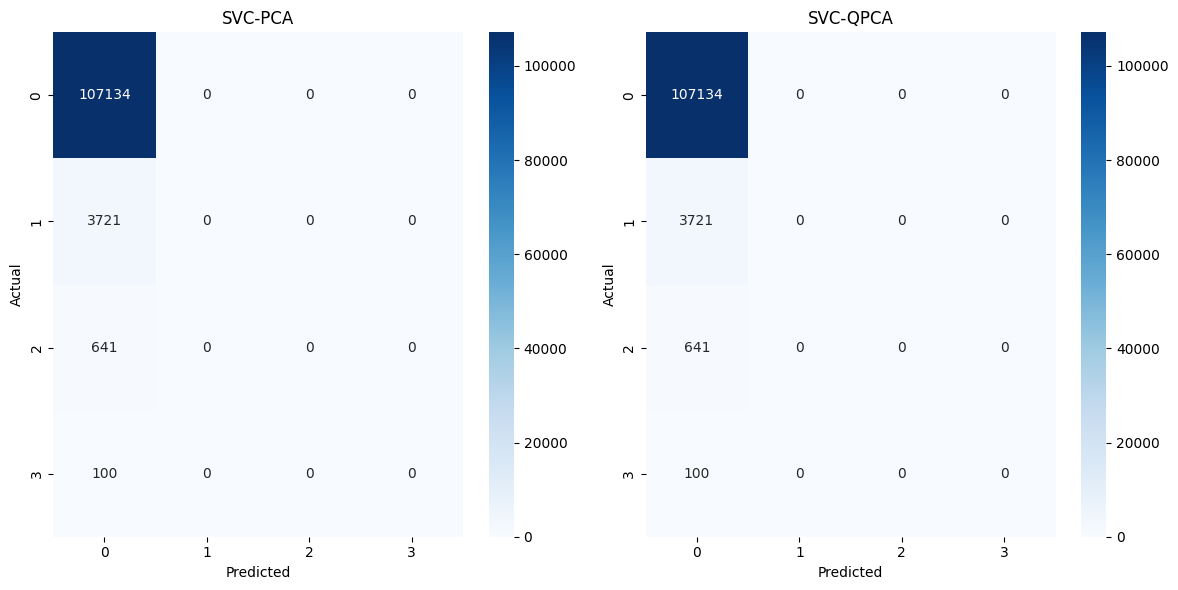

In [ ]:

from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score,accuracy_score, precision_score, recall_score, f1_score,confusion_matrix)
import seaborn as sns
# Classification evaluation
print("\nSVC-PCA:")
print(f"Accuracy: {acc_pca:.2f}")
print(f"Precision: {auc_pca:.2f}")
# print(f"Recall: {recall_score(y_cls_test, y_cls_pred_logreg, average='macro'):.2f}")
print(f"F1-Score: {f1_pca:.2f}")

print("\nSVC-QPCA:")
print(f"Accuracy: {acc_qpca:.2f}")
print(f"Precision: {auc_qpca:.2f}")
# print(f"Recall: {recall_score(y_cls_test, y_cls_pred_svc, average='macro'):.2f}")
print(f"F1-Score: {f1_qpca:.2f}")

# Confusion matrices
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test.ravel(), y_pred_pca),
            annot=True, fmt='d', cmap='Blues')
plt.title('SVC-PCA')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test.ravel(),y_pred_qpca),
            annot=True, fmt='d', cmap='Blues')
plt.title('SVC-QPCA')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [ ]:
import time
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from qiskit.quantum_info import state_fidelity

# 1. RMSE بین داده‌های اصلی و بازسازی‌شده
def calculate_rmse(original, reconstructed):
    return np.sqrt(mean_squared_error(original, reconstructed))

# 2. EVR (Explained Variance Ratio)
def explained_variance_ratio(X_original, X_reduced, components):
    X_reconstructed = X_reduced @ components.T
    total_variance = np.var(X_original, axis=0).sum()
    explained_variance = np.var(X_reconstructed, axis=0).sum()
    return explained_variance / total_variance

# 3. CR (Compression Ratio)
def compression_ratio(original_dim, compressed_dim):
    return original_dim / compressed_dim

# 4. زمان اجرا
def measure_execution_time(func):
    start_time = time.time()
    result = func()
    end_time = time.time()
    return result, end_time - start_time

# 5. Quantum Fidelity
def quantum_fidelity(state1, state2):
    return state_fidelity(state1, state2)

# 6. Classification Accuracy (در قسمت قبلی محاسبه شده)

In [ ]:
# 1. RMSE برای PCA و QPCA
X_reconstructed_pca = X_reduced @ pca.components_
X_reconstructed_qpca = X_qpca @ top_eigvecs.T

rmse_pca = calculate_rmse(X_normalized[:55700], X_reconstructed_pca[:55700])
rmse_qpca = calculate_rmse(X_normalized[:55700], X_reconstructed_qpca[:55700])

# 2. EVR برای PCA و QPCA
evr_pca = explained_variance_ratio(X_normalized, X_reduced, pca.components_)
evr_qpca = explained_variance_ratio(X_normalized, X_qpca, top_eigvecs)

# 3. CR
cr_pca = compression_ratio(X_normalized.shape[1], X_reduced.shape[1])
cr_qpca = compression_ratio(X_normalized.shape[1], X_qpca.shape[1])

# 4. زمان اجرا (مثال: زمان تبدیل PCA)
_, exec_time_pca = measure_execution_time(lambda: pca.transform(X_test_normalized))
_, exec_time_qpca = measure_execution_time(lambda: X_test_normalized @ top_eigvecs)

# 5. Quantum Fidelity (بین دو حالت کوانتومی)
# فرض بر این است که هر نمونه یک حالت کوانتومی دارد
# برای مثال، اولین نمونه از PCA و QPCA
statevector_simulator = Aer.get_backend('statevector_simulator')

# حالت PCA (شبیه‌سازی به عنوان حالت کوانتومی)
qc_pca = QuantumCircuit(num_qubits)
for i in range(num_qubits):
    qc_pca.ry(X_normalized[0, i], i)
state_pca = Statevector(qc_pca).evolve(transpile(qc_pca, simulator))

# حالت QPCA
qc_qpca = QuantumCircuit(num_qubits)
for i in range(num_qubits):
    qc_qpca.ry(X_qpca[0, i % num_target_dim], i)
state_qpca = Statevector(qc_qpca).evolve(transpile(qc_qpca, simulator))

fid = quantum_fidelity(state_pca, state_qpca)

In [ ]:
# نمایش نتایج
print("\n" + "=" * 40)
print("Evaluation Metrics for PCA and QPCA")
print("=" * 40)
print(f"{'Metric':<20} | {'PCA':<10} | {'QPCA':<10}")
print("-" * 40)
print(f"{'RMSE':<20} | {rmse_pca:.4f}   | {rmse_qpca:.4f}")
print(f"{'EVR':<20} | {evr_pca:.4f}   | {evr_qpca:.4f}")
print(f"{'CR':<20} | {cr_pca:.4f}   | {cr_qpca:.4f}")
print(f"{'Execution Time (s)':<20} | {exec_time_pca:.4f}   | {exec_time_qpca:.4f}")
print(f"{'Quantum Fidelity':<20} | {'-':<10} | {fid:.4f}")
print("=" * 40)


Evaluation Metrics for PCA and QPCA
Metric               | PCA        | QPCA      
----------------------------------------
RMSE                 | 0.5155   | 0.5567
EVR                  | 1.0000   | 0.0004
CR                   | 1.0000   | 2.0000
Execution Time (s)   | 0.0066   | 0.0026
Quantum Fidelity     | -          | 0.7673


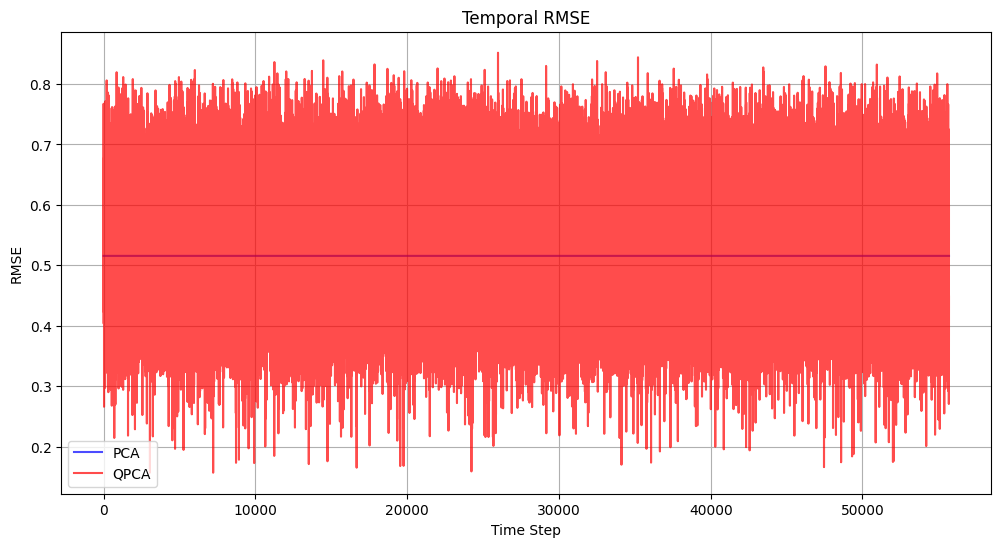

In [ ]:
# محاسبه RMSE زمانی برای PCA و QPCA
rmse_temporal_pca = []
rmse_temporal_qpca = []

for i in range(len(X_normalized[:55700])):
    # بازسازی داده‌های PCA و QPCA
    X_reconstructed_pca = X_reduced[i] @ pca.components_
    X_reconstructed_qpca = X_qpca[i] @ top_eigvecs.T

    # محاسبه RMSE برای هر نمونه
    rmse_pca = np.sqrt(mean_squared_error(X_normalized[i], X_reconstructed_pca))
    rmse_qpca = np.sqrt(mean_squared_error(X_normalized[i], X_reconstructed_qpca))

    rmse_temporal_pca.append(rmse_pca)
    rmse_temporal_qpca.append(rmse_qpca)

# رسم نمودار RMSE زمانی
plt.figure(figsize=(12, 6))
plt.plot(rmse_temporal_pca, label='PCA', color='blue', alpha=0.7)
plt.plot(rmse_temporal_qpca, label='QPCA', color='red', alpha=0.7)
plt.title('Temporal RMSE')
plt.xlabel('Time Step')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()

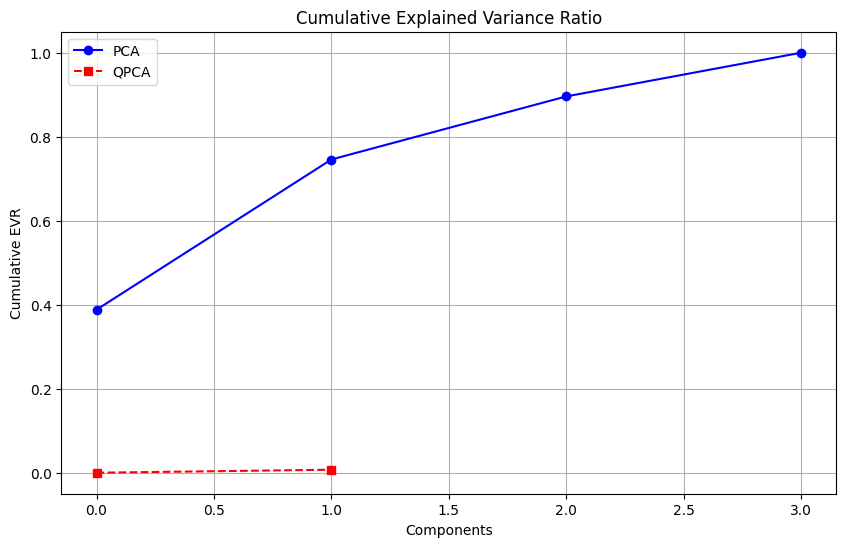

In [ ]:
# EVR تجمعی برای PCA
explained_variance_pca = pca.explained_variance_ratio_
cumulative_evr_pca = np.cumsum(explained_variance_pca)

# EVR تجمعی برای QPCA (فرض: top_eigvecs دارای بردارهای ویژه است)
# محاسبه EVR برای QPCA
explained_variance_qpca = np.var(X_qpca, axis=0) / np.var(X_normalized[:55700], axis=0).sum()
cumulative_evr_qpca = np.cumsum(explained_variance_qpca)

# رسم نمودار EVR تجمعی
plt.figure(figsize=(10, 6))
plt.plot(cumulative_evr_pca, 'o-', label='PCA', color='blue')
plt.plot(range(num_target_dim), cumulative_evr_qpca, 's--', label='QPCA', color='red')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Components')
plt.ylabel('Cumulative EVR')
plt.legend()
plt.grid(True)
plt.show()

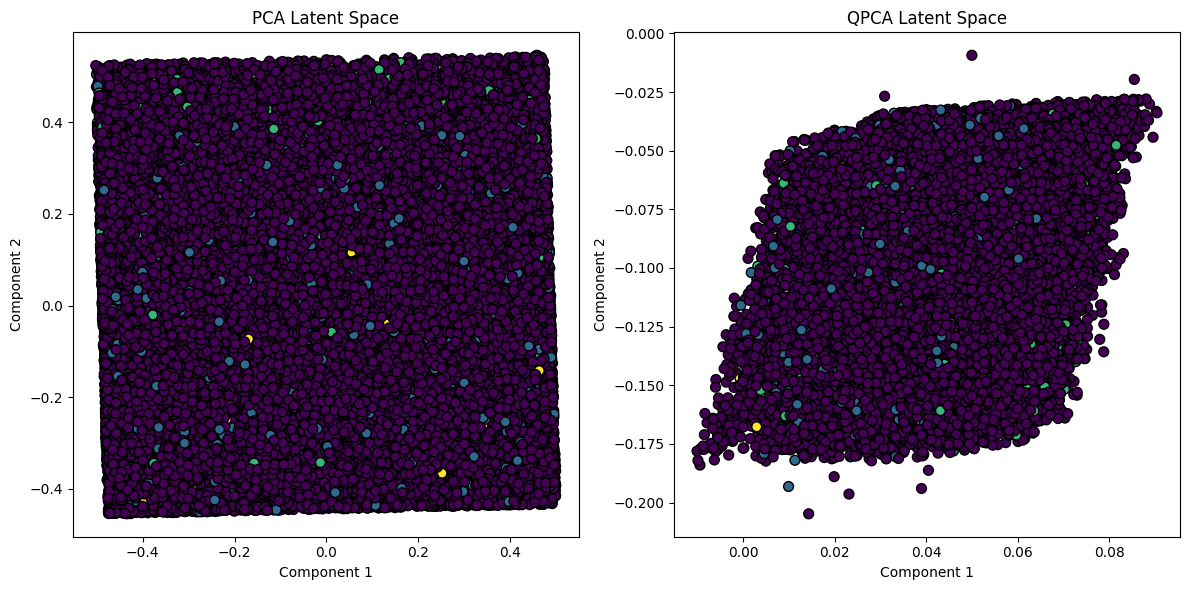

In [ ]:
# مقایسه فضای پنهان PCA و QPCA
plt.figure(figsize=(12, 6))

# PCA
plt.subplot(1, 2, 1)
plt.scatter(X_reduced[:55700, 0], X_reduced[:55700, 1], c=y_train[:55700], cmap='viridis', edgecolor='k', s=50)
plt.title('PCA Latent Space')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# QPCA
plt.subplot(1, 2, 2)
plt.scatter(X_qpca[:55700, 0], X_qpca[:55700, 1], c=y_train[:55700], cmap='viridis', edgecolor='k', s=50)
plt.title('QPCA Latent Space')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.tight_layout()
plt.show()

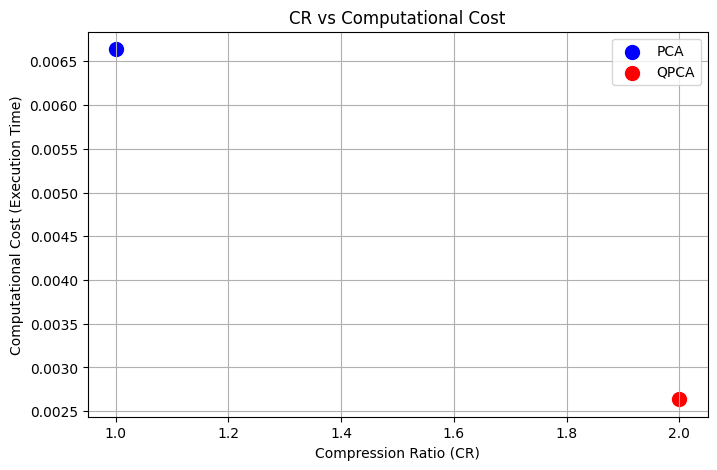

In [ ]:
# فرض: computational_cost_pca و computational_cost_qpca از زمان اجرا محاسبه شده‌اند
# محاسبه CR
cr_pca = compression_ratio(X_normalized.shape[1], X_reduced.shape[1])
cr_qpca = compression_ratio(X_normalized.shape[1], X_qpca.shape[1])

# رسم نمودار CR vs Computational Cost
plt.figure(figsize=(8, 5))
plt.scatter([cr_pca], [exec_time_pca], color='blue', label='PCA', s=100)
plt.scatter([cr_qpca], [exec_time_qpca], color='red', label='QPCA', s=100)
plt.xlabel("Compression Ratio (CR)")
plt.ylabel("Computational Cost (Execution Time)")
plt.title("CR vs Computational Cost")
plt.legend()
plt.grid(True)
plt.show()

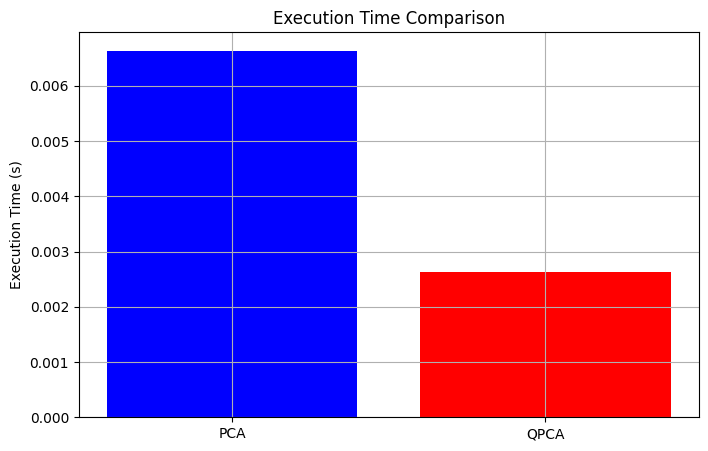

In [ ]:
# مقایسه زمان اجرا
plt.figure(figsize=(8, 5))
plt.bar(['PCA', 'QPCA'], [exec_time_pca, exec_time_qpca], color=['blue', 'red'])
plt.ylabel('Execution Time (s)')
plt.title('Execution Time Comparison')
plt.grid(True)
plt.show()

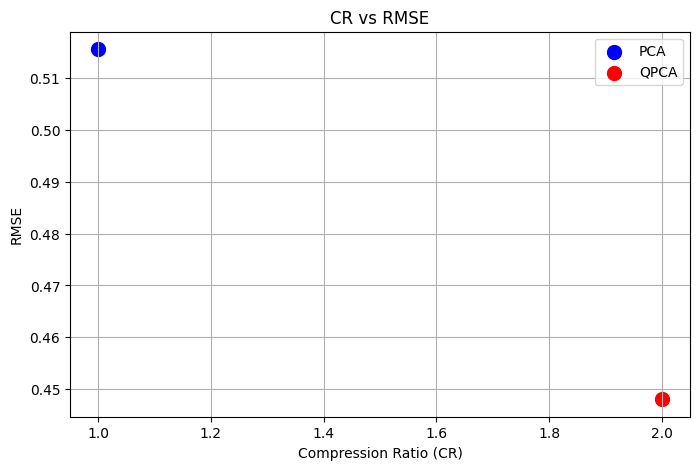

In [ ]:
# رسم CR vs RMSE
plt.figure(figsize=(8, 5))
plt.scatter([cr_pca], [rmse_pca], color='blue', label='PCA', s=100)
plt.scatter([cr_qpca], [rmse_qpca], color='red', label='QPCA', s=100)
plt.xlabel("Compression Ratio (CR)")
plt.ylabel("RMSE")
plt.title("CR vs RMSE")
plt.legend()
plt.grid(True)
plt.show()

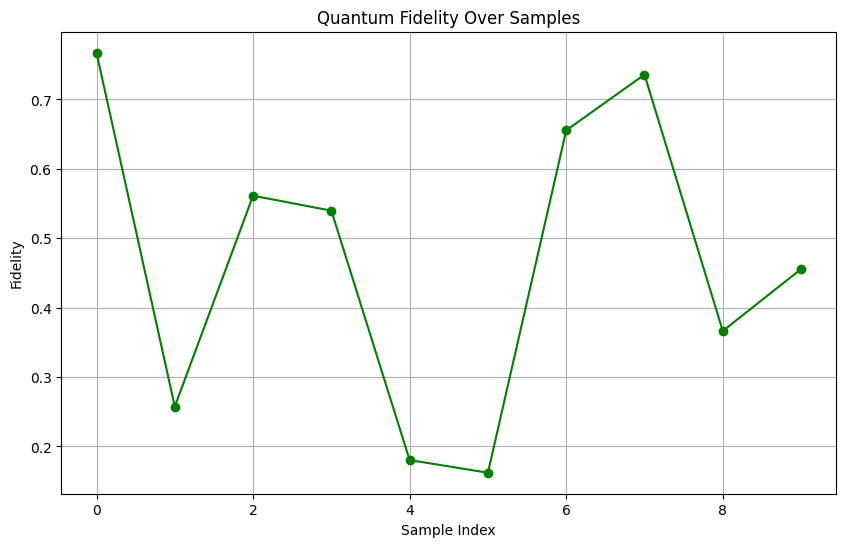

In [ ]:
# محاسبه Quantum Fidelity برای تمام نمونه‌ها
fidelities = []
for i in range(min(10, len(X_normalized[:55700]))):  # فقط ۱۰ نمونه اول برای سرعت
    # حالت PCA
    qc_pca = QuantumCircuit(num_qubits)
    for j in range(num_qubits):
        qc_pca.ry(X_normalized[i, j], j)
    state_pca = Statevector(qc_pca).evolve(transpile(qc_pca, simulator))

    # حالت QPCA
    qc_qpca = QuantumCircuit(num_qubits)
    for j in range(num_qubits):
        qc_qpca.ry(X_qpca[i, j % num_target_dim], j)
    state_qpca = Statevector(qc_qpca).evolve(transpile(qc_qpca, simulator))

    # محاسبه Fidelity
    fid = quantum_fidelity(state_pca, state_qpca)
    fidelities.append(fid)

# رسم Quantum Fidelity
plt.figure(figsize=(10, 6))
plt.plot(fidelities, 'o-', color='green')
plt.title('Quantum Fidelity Over Samples')
plt.xlabel('Sample Index')
plt.ylabel('Fidelity')
plt.grid(True)
plt.show()

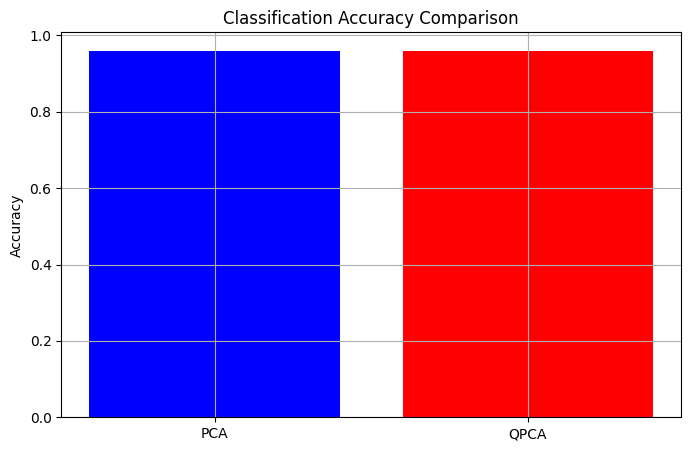

In [ ]:
# مقایسه دقت طبقه‌بندی
plt.figure(figsize=(8, 5))
plt.bar(['PCA', 'QPCA'], [acc_pca, acc_qpca], color=['blue', 'red'])
plt.ylabel('Accuracy')
plt.title('Classification Accuracy Comparison')
plt.grid(True)
plt.show()

In [ ]:
list1 = []
list1.extend(x for x in range(10))

In [ ]:
list1

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

SyntaxError: invalid syntax (ipython-input-3671457380.py, line 1)